# What is the Goal?
Given an array nums and an integer k, find the total number of subarrays whose sum equals k.

# Key Idea: Prefix Sum
Basically prefix means you add from start of index to the current index say a[0:j] and when you want let say sum of number between a[i:j]
you will simple take sum of a[0:i] and then a[0:j] and subtract then ot get teh sum of elemnent btw a[i:j]
THIS IS PREFIX SUM BENEFIT you o=dont have to recalucte the sum eveyr time you can use math of get teh overlapping calcution avoided

A prefix sum is the cumulative sum of elements from the start of the array up to a certain index.
Let’s denote current_sum as the prefix sum at the current index.

# prefix_sum[j] - prefix_sum[i-1]

## Q1. This calculates the sum of the subarray nums[i:j]:

prefix_sum[j] = Sum of elements from nums[0] to nums[j].
prefix_sum[i-1] = Sum of elements from nums[0] to nums[i-1].
Subtracting them gives the sum of the subarray from nums[i] to nums[j].
Special Case:
If i = 0, then:

plaintext
Copy code
Sum = prefix_sum[j]

## Why Useful?
It computes subarray sums in O(1) using cumulative sums, avoiding repeated calculations.

# The sum of a subarray nums[i:j] is:
Sum(nums[i:j]) = prefix_sum[j] - prefix_sum[i-1]

# Rearrange to find if the subarray sum equals k:
prefix_sum[j] - prefix_sum[i-1] = k

# This simplifies to:
prefix_sum[i-1] = prefix_sum[j] - k

# Hashmap Explanation
Key: The prefix sum (cumulative sum of elements up to the current index).
Value: The number of times this prefix sum has occurred so far during the traversal.

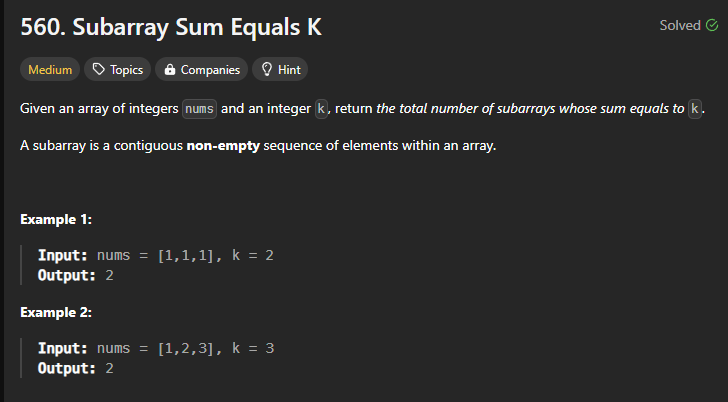

In [ ]:
# Subarray Sum eauals K

from typing import List
from collections import defaultdict

class Solution:
    def subarraySum(self, nums: List[int], k: int) -> int:
        prefix_sum = defaultdict(int)  # To store frequencies of prefix sums
        prefix_sum[0] = 1  # Initialize to handle subarrays starting at index 0
        current_sum = 0  # Tracks the running prefix sum
        count = 0  # Tracks the number of subarrays with sum == k

        for num in nums:
            current_sum += num  # Add the current number to the running sum

            # Check if there exists a prefix sum such that current_sum - prefix_sum = k
            if current_sum - k in prefix_sum:
                count += prefix_sum[current_sum - k]  # Add its frequency to count

            # Update the prefix_sum hashmap
            prefix_sum[current_sum] += 1

        return count